<a href="https://colab.research.google.com/github/tailorfenil/MLColab/blob/FNN_Model_Predict_Laptop_Price/Assignment_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Please make a copy of this notebook and try solving the below questions in your notebook copy. Solutions for these will be discussed in the assignment review session on <day> post which, we will also share the solution notebook.


# **Good Luck**

#Laptops Price Dataset
This dataset provides a comprehensive collection of information on various laptops, enabling a detailed analysis of their specifications and pricing. It encompasses a wide range of laptops, encompassing diverse brands, models, and configurations, making it a valuable resource for researchers, data analysts, and machine learning enthusiasts interested in the laptop industry.

The data comes from the spanish website PC componentes. The data was collected using Power Automate, more info on: https://github.com/juanmerino89/laptops-data-cleaning

####Fields included:

**Laptop Name**: The unique identifier or model name of the laptop.
**Brand**: Laptop brand.
**Model**: Laptop brand model.
**CPU (Central Processing Unit)**: The processor brand, model, and other relevant details.
**GPU (Graphics Processing Unit)**: The graphics card brand, model, and associated specifications.
**RAM (Random Access Memory)**: The amount of memory available for multitasking.
**Storage**: The storage type (HDD, SSD) and capacity of the laptop.
Price: The cost of the laptop in the respective currency.
By utilizing this dataset, researchers and analysts can explore patterns, trends, and relationships between laptop specifications and their pricing. It serves as an excellent resource for tasks such as price prediction, market analysis, and comparison of different laptop configurations. Whether you are interested in identifying the most cost-effective options or understanding the impact of specific hardware components on laptop prices, this dataset offers abundant possibilities for in-depth exploration.

##Question 1
####Import the libraries and extract the dataset from zipped file.

In [6]:
#Solution 1(your code here)

import pandas as pd
import zipfile

# Assuming the dataset is in a zipped file named 'laptops.zip'
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

##Question 2
####Import the dataset - 'laptops.csv'

In [7]:
#Solution 2(your code here)
dataset_path = 'data_folder/laptops.csv'
laptops_data = pd.read_csv(dataset_path)

In [8]:
print(laptops_data.head())

                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        Model            CPU  RAM  Storage Storage type       GPU  Screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  Touch  Final Price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

##Question 3
####Perform EDA on the datsaet to understand the data.

In [ ]:
#Solution 3(your code here)

##Question 4
####Extract the information to train the model from the dataset.

In [13]:
#Solution 4(your code here)
X = laptops_data[['CPU', 'GPU', 'RAM', 'Storage']]
y = laptops_data['Final Price']
X_encoded = pd.get_dummies(X, columns=['CPU', 'GPU'], drop_first=True)

##Question 5
####Train the FNN model.

In [14]:
#Solution 5(your code here)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fnn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
fnn_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)

##Question 6
####Plot the train loss vs Validation loss.

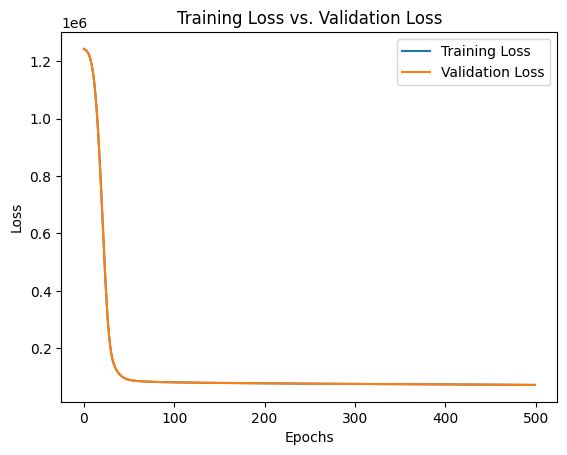

In [16]:
# Get training loss and validation loss
train_loss = fnn_model.loss_curve_
validation_loss = fnn_model.loss_curve_  # Assuming scikit-learn also records validation loss

# Plot the training loss vs. validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.show()